In [1]:
#%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

cols_m = inspector.get_columns('measurement')
for c in cols_m:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
### Design a query to retrieve the last 12 months of precipitation data and plot the results


## Calculate the date 1 year ago from today

#last_year = (dt.date.today() - dt.timedelta(365.25))
#print(last_year)


## Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date).all()

print(results)

precip = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()


## Save the query results as a Pandas DataFrame and set the index to the date column


## Sort the dataframe by date


filtered_query = session.query( Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-24').order_by(Measurement.date).all()
m_df = pd.DataFrame(filtered_query, columns=['date', 'prcp'])
m_df = m_df.set_index('date')

m_df

[('2010-01-01',), ('2010-01-02',), ('2010-01-03',), ('2010-01-04',), ('2010-01-06',), ('2010-01-07',), ('2010-01-08',), ('2010-01-09',), ('2010-01-10',), ('2010-01-11',), ('2010-01-12',), ('2010-01-14',), ('2010-01-15',), ('2010-01-16',), ('2010-01-17',), ('2010-01-18',), ('2010-01-19',), ('2010-01-20',), ('2010-01-21',), ('2010-01-22',), ('2010-01-23',), ('2010-01-24',), ('2010-01-25',), ('2010-01-26',), ('2010-01-27',), ('2010-01-28',), ('2010-01-30',), ('2010-01-31',), ('2010-02-01',), ('2010-02-03',), ('2010-02-04',), ('2010-02-05',), ('2010-02-06',), ('2010-02-07',), ('2010-02-08',), ('2010-02-09',), ('2010-02-11',), ('2010-02-12',), ('2010-02-13',), ('2010-02-14',), ('2010-02-15',), ('2010-02-16',), ('2010-02-17',), ('2010-02-19',), ('2010-02-20',), ('2010-02-21',), ('2010-02-22',), ('2010-02-23',), ('2010-02-24',), ('2010-02-25',), ('2010-02-26',), ('2010-02-28',), ('2010-03-01',), ('2010-03-02',), ('2010-03-03',), ('2010-03-04',), ('2010-03-05',), ('2010-03-06',), ('2010-03-07'

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


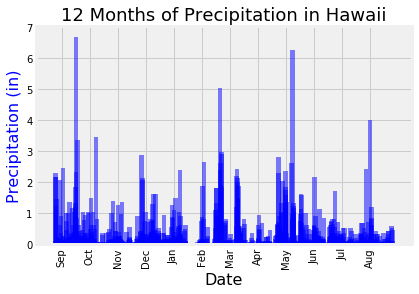

<Figure size 432x288 with 0 Axes>

In [24]:
#x = np.arange(0,2224,1).tolist()
x = np.arange(0, len(m_df.index.tolist()), 1)
y = m_df['prcp'].tolist()

## Use Pandas Plotting with Matplotlib to plot the data

months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]
mts = int(len(y) / 12)



plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")

plt.xlabel("Date", fontsize = 16)
plt.ylabel("Precipitation (in)", fontsize = 16, color = "blue")

#plt.set_xticklabels(df.C, rotation=90)
plt.title("12 Months of Precipitation in Hawaii", fontsize = 18)
plt.grid(True)



xticks1 = range(56, len(y), mts)
plt.xticks(xticks1, months, rotation=90)
## Rotate the xticks for the dates
plt.show()
plt.tight_layout()
# Save Figure
plt.savefig('precipitation.jpg')


In [20]:
len(y)

2223

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats_df = m_df.describe()
stats_df

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# How many stations are available in this dataset?

station_query = session.query(Measurement.date, Measurement.station).filter(Measurement.date >= '2016-08-24').order_by(Measurement.date).all()

station_df = pd.DataFrame(station_query, columns=['date','station'])
station_df.set_index('date')
station_df #.head(10)


station_ct = station_df['station'].nunique()
station_ct

7

In [31]:
# What are the most active stations?
# List the stations and the counts in descending order.
activity_query = session.query(Measurement.id, Measurement.station, Measurement.date, func.sum(Measurement.prcp), Measurement.tobs).\
filter(Measurement.date >= '2016-08-24').group_by(Measurement.station).order_by(Measurement.date).all()

activity_df = pd.DataFrame(activity_query, columns=['id', 'station', 'date', 'prcp', 'tobs'])
activity_df.set_index('date', inplace=True )
activity_df #.head(10)

activity_df = activity_df.sort_values(['prcp'],ascending = False).reset_index()
activity_df[['station', 'prcp']]

,station,prcp
0,USC00516128,147.11
1,USC00519281,68.24
2,USC00513117,48.36
3,USC00519523,37.99
4,USC00514830,33.19
5,USC00519397,16.09
6,USC00517948,4.59


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

t_df = activity_df.loc[activity_df['station'] == 'USC00516128']
minT = t_df['tobs'].min()
maxT = t_df['tobs'].max()
avgT = t_df['tobs'].mean()
print(minT)
print(maxT)
print(avgT)

76.0
76.0
76.0


In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

t_activity_query = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, func.count(Measurement.tobs)).\
filter(Measurement.date >= '2016-08-24').group_by(Measurement.station).order_by(Measurement.date).all()

tobs_df = pd.DataFrame(t_activity_query, columns=['id', 'station', 'date', 'prcp', 'tobs'])
tobs_df.set_index('date', inplace=True )
tobs_df
 #.head(10)

mod_df = tobs_df.sort_values(['tobs'],ascending = False).reset_index()
mod_df = mod_df[['station','tobs']]

mod_df.rename(columns={'tobs': 'T_Count'}, inplace=True)

mod_df

,station,T_Count
0,USC00519397,360
1,USC00519281,351
2,USC00516128,348
3,USC00513117,342
4,USC00519523,336
5,USC00514830,304
6,USC00517948,182


In [81]:
t_query = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-24').all()

temp_df = pd.DataFrame(t_query, columns=['date', 'tobs'])
temp_df

t_ct_df = temp_df.groupby('tobs').nunique()
t_ct_df.rename(columns={'tobs': 'Temperature', 'date' : 'T_Number'}, inplace=True)
mod_t_ct_df = t_ct_df['T_Number']
mod_t_ct_df = pd.DataFrame(mod_t_ct_df.reset_index())
mod_t_ct_df

,tobs,T_Number
0,58.0,1
1,59.0,3
2,60.0,6
3,61.0,4
4,62.0,13
5,63.0,12
6,64.0,18
7,65.0,26
8,66.0,27
9,67.0,41


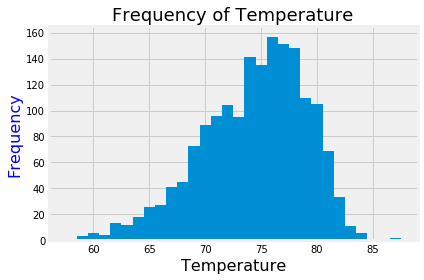

<Figure size 432x288 with 0 Axes>

In [98]:
#mod_t_ct_df.plot.hist([mod_t_ct_df.index, mod_t_ct_df.iloc[0:]])
plt.bar(mod_t_ct_df['tobs'], mod_t_ct_df['T_Number'], width = 1.0)
plt.xlabel("Temperature", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16, color = "blue")

plt.title("Frequency of Temperature", fontsize = 18)
plt.grid(True)

plt.tight_layout()
plt.show()

plt.savefig('temperatuere.jpg')

In [95]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2016-08-24', '2017-08-23'))

[(58.0, 74.57894736842105, 87.0)]


In [97]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = "2016-08-24"
end_date = "2017-08-23"

tmin, tavg, tmax = calc_temps(start_date, end_date)[0]
print(tmin, tavg, tmax)

58.0 74.57894736842105 87.0


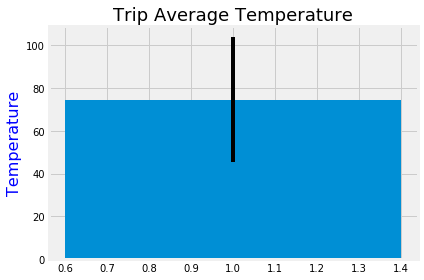

<Figure size 432x288 with 0 Axes>

In [100]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(1, tavg, yerr=(tmax-tmin))

plt.ylabel("Temperature", fontsize = 16, color = "blue")

plt.title("Trip Average Temperature", fontsize = 18)
plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig('error.jpg')

In [101]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
cols_s = inspector.get_columns('Station')
for c in cols_s:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [102]:
filtered_query_s = session.query( Station.station, Station.latitude, Station.longitude, Station.elevation).all()
s_df = pd.DataFrame(filtered_query_s, columns=['station', 'latitude', 'longitude', 'elevation'])

In [107]:
s_prcp_df = pd.merge(s_df, activity_df, on='station', how="inner")
s_prcp_df.sort_values(['prcp'],ascending = False)


,station,latitude,longitude,elevation,date,id,prcp,tobs
6,USC00516128,21.33310,-157.80250,152.4,2017-08-23,19550,147.11,76.0
5,USC00519281,21.45167,-157.84889,32.9,2017-08-18,14959,68.24,79.0
1,USC00513117,21.42340,-157.80150,14.6,2017-07-31,5433,48.36,77.0
4,USC00519523,21.33556,-157.71139,19.5,2017-08-23,12187,37.99,82.0
2,USC00514830,21.52130,-157.83740,7.0,2017-08-23,7635,33.19,82.0
0,USC00519397,21.27160,-157.81680,3.0,2017-08-23,2724,16.09,81.0
3,USC00517948,21.39340,-157.97510,11.9,2017-07-31,9007,4.59,81.0


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
